Unggah gambar pakaian/sepatu/tas (format: jpg, png, dll)


Saving images3.jpg to images3 (2).jpg
Memproses file: images3 (2).jpg


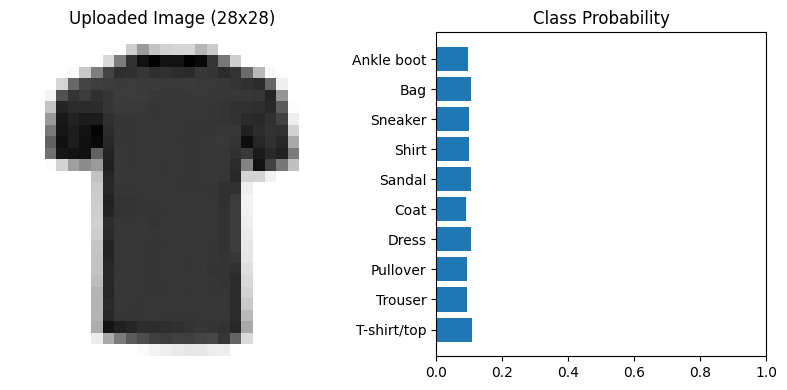


🔍 Prediksi: T-shirt/top
✅ Confidence: 10.77%


In [7]:
# ==============================
# 1. IMPORT LIBRARY
# ==============================
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# ==============================
# 2. DEFINISI MODEL (SAMA DENGAN YANG DILATIH)
# ==============================
model = nn.Sequential(
    nn.Linear(784, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

# Load state_dict jika Anda menyimpan model sebelumnya
# Jika tidak, model akan random → hasil prediksi tidak valid!
# Untuk demo ini, kita asumsikan Anda sudah melatih & menyimpan model:
# torch.save(model.state_dict(), 'fashion_mnist_model.pth')

# Jika Anda belum menyimpan model, Anda HARUS menjalankan training dulu di notebook yang sama.
# Jika sudah, uncomment baris berikut:
# model.load_state_dict(torch.load('fashion_mnist_model.pth'))

# Pindahkan ke device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # mode evaluasi

# ==============================
# 3. FUNGSI PREDIKSI DARI GAMBAR UPLOAD
# ==============================
def predict_uploaded_image(image_path):
    # Buka dan proses gambar
    img = Image.open(image_path).convert('L')  # grayscale
    img = img.resize((28, 28))  # sesuai ukuran Fashion-MNIST

    # Transform ke tensor dan normalisasi
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    img_tensor = transform(img)  # shape: (1, 28, 28)
    img_flat = img_tensor.view(1, -1).to(device)  # flatten ke (1, 784)

    # Prediksi
    with torch.no_grad():
        log_ps = model(img_flat)
        ps = torch.exp(log_ps).cpu().numpy().squeeze()

    return img, ps

# ==============================
# 4. UPLOAD GAMBAR
# ==============================
print("Unggah gambar pakaian/sepatu/tas (format: jpg, png, dll)")
uploaded = files.upload()

if not uploaded:
    print("Tidak ada file diunggah.")
else:
    # Ambil file pertama
    image_path = list(uploaded.keys())[0]
    print(f"Memproses file: {image_path}")

    # Prediksi
    original_img, probabilities = predict_uploaded_image(image_path)

    # Nama kelas Fashion-MNIST
    label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Visualisasi
    fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)

    # Gambar asli (28x28)
    ax1.imshow(original_img, cmap='gray')
    ax1.axis('off')
    ax1.set_title('Uploaded Image (28x28)')

    # Probabilitas
    ax2.barh(np.arange(10), probabilities)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(label_names, size='medium')
    ax2.set_xlim(0, 1)
    ax2.set_title('Class Probability')

    plt.tight_layout()
    plt.show()

    # Prediksi tertinggi
    predicted_class = label_names[np.argmax(probabilities)]
    confidence = np.max(probabilities)
    print(f"\n🔍 Prediksi: {predicted_class}")
    print(f"✅ Confidence: {confidence:.2%}")